## What are the most demanded skills for the top 3 most popular data roles?

### Methodology

* Clean-up skill column
* Calculate skill count based on job_title_short
* Calculate skill percentage
* Plot final findings

### Import Libraries and Data

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\sande\anaconda3\envs\my_learnings\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Filter Data for the United States

In [2]:
df_US = df[df['job_country'] == 'United States']

## Explode Skills

In [3]:
#this will allows us to analyze the distribution of skills across different data job titles.

df_skills = df_US.explode('job_skills')

df_skills[['job_title', 'job_skills']]



,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,None
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,python
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,c++
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,java
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,matlab
...,...,...
785692,Data Scientist- Hybrid Work Location,r
785703,Data Analyst - CRYPTOGRAPHY - Full-time,None
785705,Expert Business Data Analyst - Now Hiring,sql
785705,Expert Business Data Analyst - Now Hiring,python


## Count Skills per Job Title

In [4]:
# Group by job_skills and job_title_short and count the number of occurrences
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

#since it was in series we will convert it to Dataframe for ease of manipulation. 
# #we just need to use the .reset_index() to convert series to Dataframe

df_skills_count = df_skills_count.reset_index(name='skill_count')  

# Sort the values by skill_count in descending order
df_skills_count.sort_values(by='skill_count', ascending=False, inplace= True)

df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


## Create List of Top 3 Roles
* Focus: Data Analysts, Data Engineers, and Data Scientists

In [5]:

#creating list  of job title 
job_titles = df_skills_count['job_title_short'].unique().tolist()  

#since its list we will acesss by top 3 as below
job_titles = job_titles[:3]

#we are sorting the values 
job_titles = sorted(job_titles)

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

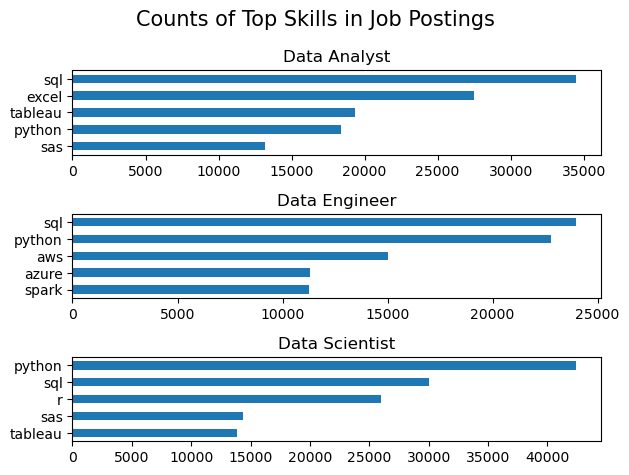

In [6]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == title].head(5)
    df_plot.plot(kind= 'barh', x='job_skills', y= 'skill_count', ax= ax[i], title= title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize= 15)
plt.tight_layout()
plt.show()


In [7]:
df_skills_count


,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [ ]:
#we want to show the likehood of skill mentioned in the job posting. we want the percetage of each skills.
#first we will get total job_postings from the original Df_US dataset
#then we will do Value count. It will be in series so we will convert to Dataframe by just reseting the index.

df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [ ]:
#now we will cerate new dataframe by using merge because we have two dataframe first is df_skill_count and 2nd is df_job_title_count
#we will do left join because we want all the data form df_skills_count and one coloumn from df_job_title_count. we will use job_title short to join on

df_skill_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

#now we will create the new column name skill percent we will divide skill_count / jobs_total and multiply it by 100 so we dont have percentage in point

df_skill_perc['skill_percent'] =  100 * df_skill_perc['skill_count'] / df_skill_perc['jobs_total']

df_skill_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


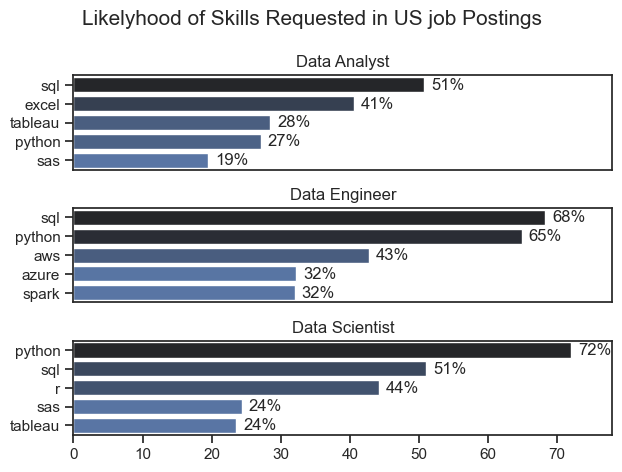

In [ ]:

fig, ax = plt.subplots(len(job_titles), 1)
sns.set_theme(style= 'ticks')

for i, title in enumerate(job_titles):
    df_plot = df_skill_perc[df_skill_perc['job_title_short'] == title].head(5)
   
    sns.barplot(data=df_plot, x= 'skill_percent', y= 'job_skills', ax= ax[i], hue= 'skill_count', palette= 'dark:b_r')

    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 78)
    ax[i].set_title(title)

    for n, v in enumerate(df_plot['skill_percent']):    
        ax[i].text(v + 1, n, f'{v:.0f}%', va= 'center')

        if i != len(job_titles) - 1:
            ax[i].set_xticks([])

fig.suptitle('Likelyhood of Skills Requested in US job Postings', fontsize= 15)
plt.tight_layout()
plt.show()

In [ ]:
# Key Points of the Code:

# Subplots Creation:

# Creates a vertical stack of subplots, one for each job title (len(job_titles)).

# Seaborn Theme:

# Sets the plot style to 'ticks' for a clean design.

# Data Filtering:

# Filters the dataset (df_skill_perc) for the top 5 skills of each job title.

# Bar Plot:

# Uses sns.barplot to create horizontal bar charts, with:
# x='skill_percent' for bar lengths.
# y='job_skills' for labels.
# hue='skill_count' for bar color variation.

# Axis Customization:

# Removes x-axis and y-axis labels, hides legends, and sets a consistent x-axis range.

# Percentage Labels:

# Adds percentage values (f'{v:.0f}%') as labels to each bar.

# X-Tick Visibility:

# Hides x-ticks for all but the last subplot.

# Titles:

# Each subplot gets the corresponding job title as a title.

# Figure Title and Layout:

# Adds a main title to the figure and adjusts layout for readability.

# Display:

# Finally, renders the bar chart using plt.show().

In [38]:

# for n, v in enumerate(df_plot['skill_percent']):
#     ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

# Loops through each bar in the subplot and places a label showing the skill_percent value:
# v + 1: Position the text slightly to the right of the bar.
# n: Align the label with the corresponding bar.
# f'{v:.0f}%': Format the percentage value with no decimals, followed by %.
# va='center': Vertically aligns the label in the middle of the bar.

In [ ]:
# if i != len(job_titles) - 1:
#     ax[i].set_xticks([])

# Hides x-axis tick labels for all subplots except the last one to avoid repetition.

In [ ]:
# sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')

# Creates a horizontal bar plot on subplot ax[i] for the filtered data.
# x='skill_percent': The percentage of job postings requiring a skill determines the bar length.
# y='job_skills': The skill names appear on the y-axis.
# hue='skill_count': Uses the skill_count column to add a secondary variable represented by the color of the bars.
# palette='dark:b_r': Applies a dark gradient color palette.
